In [7]:
import numpy as np
import ants
import matplotlib.pyplot as plt
import nibabel as nib

In [9]:
fwd_transform_path1 = "output/registered/transforms/degu_191_fwd_tmpao0xre8g1Warp.nii.gz"
fwd_transform_path2 = "output/registered/transforms/degu_191_fwd_tmpao0xre8g0GenericAffine.mat"
inv_transform_path1 = "output/registered/transforms/degu_191_inv_tmpao0xre8g0GenericAffine.mat"
inv_transform_path2 = "output/registered/transforms/degu_191_inv_tmpao0xre8g1InverseWarp.nii.gz"

data_path = "output/processed/degu_191.nii.gz"
atlas_path = "output/processed/waxholm.nii.gz"

data = nib.load(data_path).get_fdata()
atlas = nib.load(atlas_path).get_fdata()

#fwd_transform1 = ants.read_transform(fwd_transform_path1)

In [ ]:
fwd_displacement_field = ants.image_read(fwd_transform_path1)

# Print information about the displacement field
print("Forward displacement field shape:", fwd_displacement_field.shape)
print("Forward displacement field pixel type:", fwd_displacement_field.pixeltype)

# Access the displacement field data as a NumPy array
fwd_displacement_field_array = fwd_displacement_field.numpy()
print("Forward displacement field array shape:", fwd_displacement_field_array.shape)
print()

###############################################################################

inv_displacement_field = ants.image_read(inv_transform_path2)

# Print information about the displacement field
print("Inverse displacement field shape:", inv_displacement_field.shape)
print("Inverse displacement field pixel type:", inv_displacement_field.pixeltype)

# Access the displacement field data as a NumPy array
inv_displacement_field_array = inv_displacement_field.numpy()
print("Inverse displacement field array shape:", inv_displacement_field_array.shape)

Forward displacement field shape: (1024, 512, 512)
Forward displacement field pixel type: float
Forward displacement field array shape: (1024, 512, 512, 3)

Inverse displacement field shape: (1024, 512, 512)
Inverse displacement field pixel type: float
Inverse displacement field array shape: (1024, 512, 512, 3)


In [18]:
# For every pixel compute the distance of displacement
# This is the same as the norm of the vector
# We can use the numpy function np.linalg.norm
#deviation_array = np.zeros(fwd_displacement_field_array.shape[:-1])
deviation_array = np.linalg.norm(fwd_displacement_field_array, axis=-1)
print("Deviation array shape:", deviation_array.shape)
print("Min deviation:", np.min(deviation_array))
print("Max deviation:", np.max(deviation_array))
print("Average deviation:", np.mean(deviation_array))
print("Median deviation:", np.median(deviation_array))
print("Std of deviation:", np.std(deviation_array))

Deviation array shape: (1024, 512, 512)
Min deviation: 0.0
Max deviation: 17.362148
Average deviation: 0.6927627
Median deviation: 0.0
Std of deviation: 1.7738603


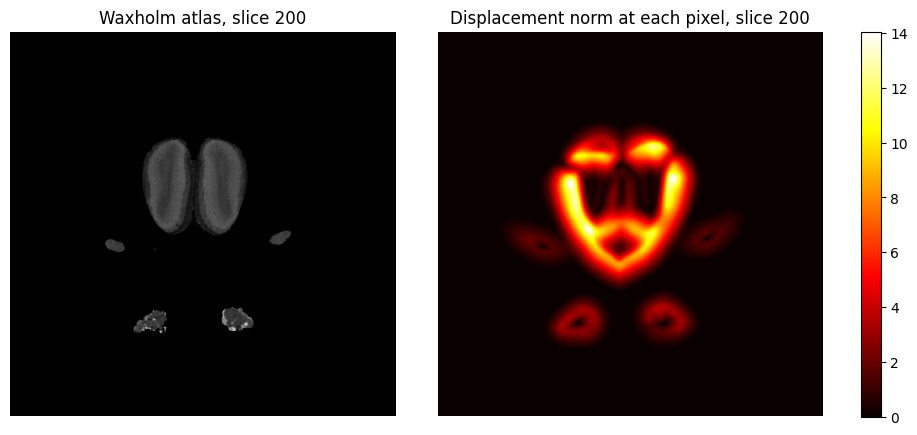

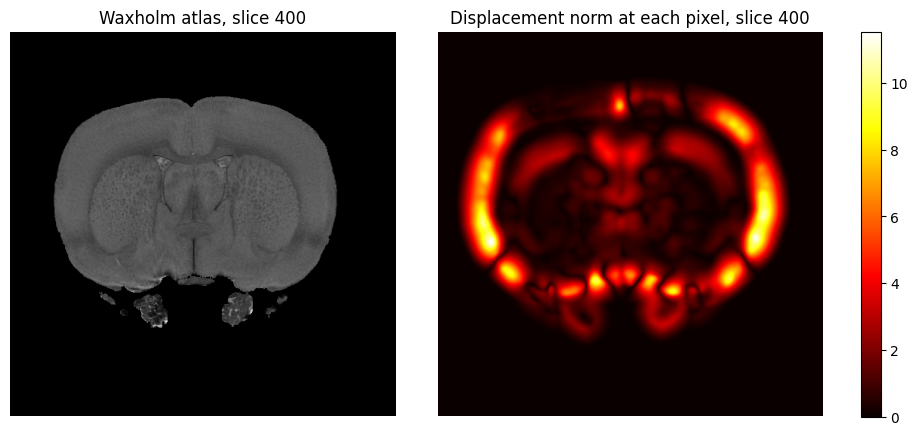

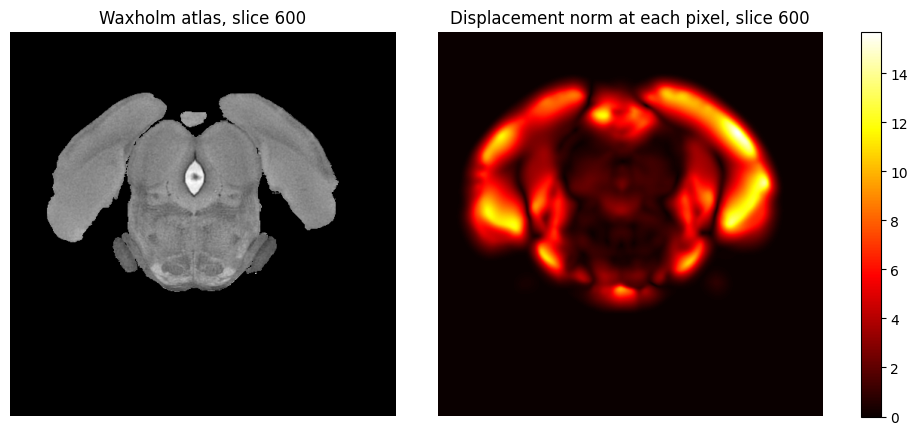

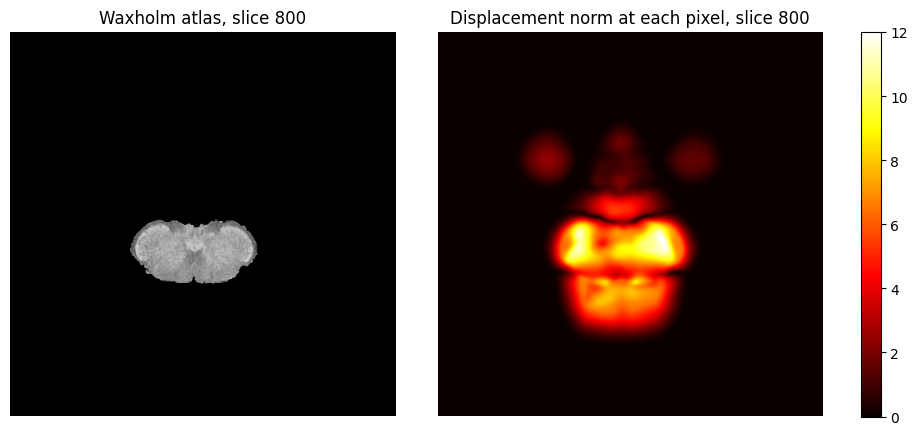

In [30]:
# Show the deformation
IDX = 200

def plot_deviation(idx, image, deviation_array):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image[idx, :, :], cmap="gray")
    plt.title(f"Waxholm atlas, slice {idx}")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    # Show colormap distance
    plt.imshow(deviation_array[idx, :, :], cmap="hot")
    plt.title(f"Displacement norm at each pixel, slice {idx}")
    plt.axis("off")
    plt.colorbar()
    plt.subplots_adjust(wspace=-0.5)  # Reduce horizontal space between subplots
    #plt.tight_layout()
    plt.show()

plot_deviation(200, atlas, deviation_array)
plot_deviation(400, atlas, deviation_array)
plot_deviation(600, atlas, deviation_array)
plot_deviation(800, atlas, deviation_array)